In [7]:
from imutils import face_utils, resize
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib

In [2]:
face_detector = dlib.get_frontal_face_detector()
face_landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

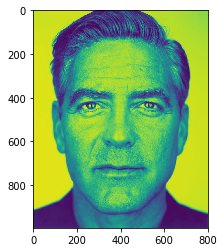

In [53]:
img = cv2.imread('george_small.jpg')
img = resize(img, width=800)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

# Store all the detected face coordinates in 'rects'
rects = face_detector(gray, 1)

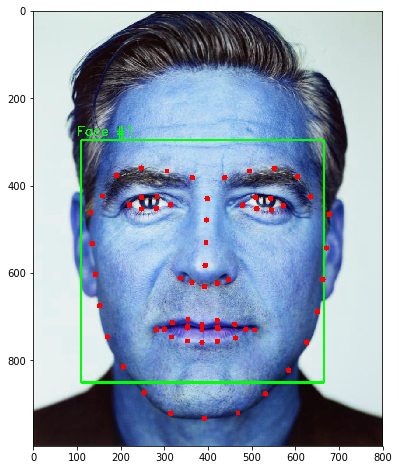

In [56]:
for (i, rect) in enumerate(rects):
    # Function takes in an image region containing some object and outputs a set of point locations
    # that define the pose of the object - Face in this case.
    shape = face_landmark_predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)  # Convert the co-ordinates to Numpy array
    
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    
    cv2.putText(img, f'Face #{i+1}', (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    
    # Iterate through all the landmark co-ordinates and draw circles around the points
    for (x, y) in shape:
        cv2.circle(img, (x, y), 1, (255, 0, 0), 10)
        
plt.figure(figsize=(12, 8))
plt.imshow(img)

# Detecting multiple Faces in image

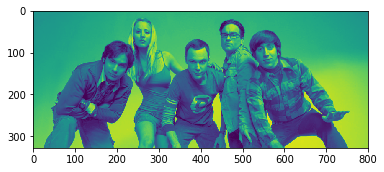

In [61]:
img = cv2.imread('BigBangTheory_1692x695.jpg')
img = resize(img, width=800)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

# Store all the detected face coordinates in 'rects'
rects = face_detector(gray, 1)

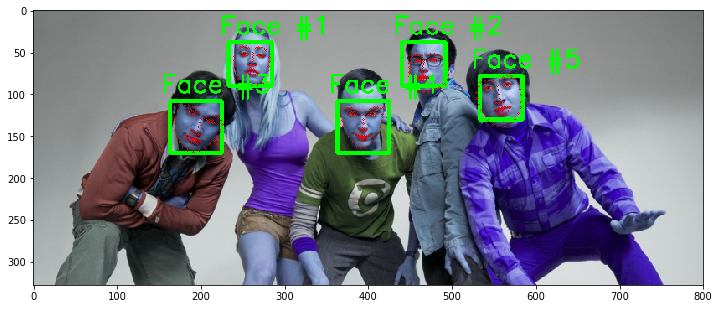

In [62]:
for (i, rect) in enumerate(rects):
    # Function takes in an image region containing some object and outputs a set of point locations
    # that define the pose of the object - Face in this case.
    shape = face_landmark_predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)  # Convert the co-ordinates to Numpy array
    
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    
    cv2.putText(img, f'Face #{i+1}', (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    
    # Iterate through all the landmark co-ordinates and draw circles around the points
    for (x, y) in shape:
        cv2.circle(img, (x, y), 1, (255, 0, 0), 1)
        
plt.figure(figsize=(12, 8))
plt.imshow(img)

# Face Landmark Detection on Video stream

In [68]:
face_detector = dlib.get_frontal_face_detector()
face_landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    rects = face_detector(gray, 1)
    
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3)
        
        cv2.putText(frame, f'Face #{i+1}', (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        
        shape = face_landmark_predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (255, 0, 0), 2)
    
    cv2.imshow('Face Landmarks', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()